In [1]:
import boto3
import dataset_handler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import io
from dataset_handler import *

2022-08-02 14:01:00.866415: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-02 14:01:00.866483: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
s3 = boto3.resource('s3', region_name='eu-central-1')
bucket = s3.Bucket('szymciemsdatasets')

In [3]:
files = np.array([obj.key for obj in bucket.objects.filter(Prefix="images/")])

In [4]:
def load_image(bucket, key):
    object = bucket.Object(key)
    response = object.get()
    file_stream = response['Body']
    im = Image.open(file_stream)
    return np.array(im)


In [5]:
files[2]

'images/1005.jpg'

In [6]:
img = load_image(bucket, files[2])

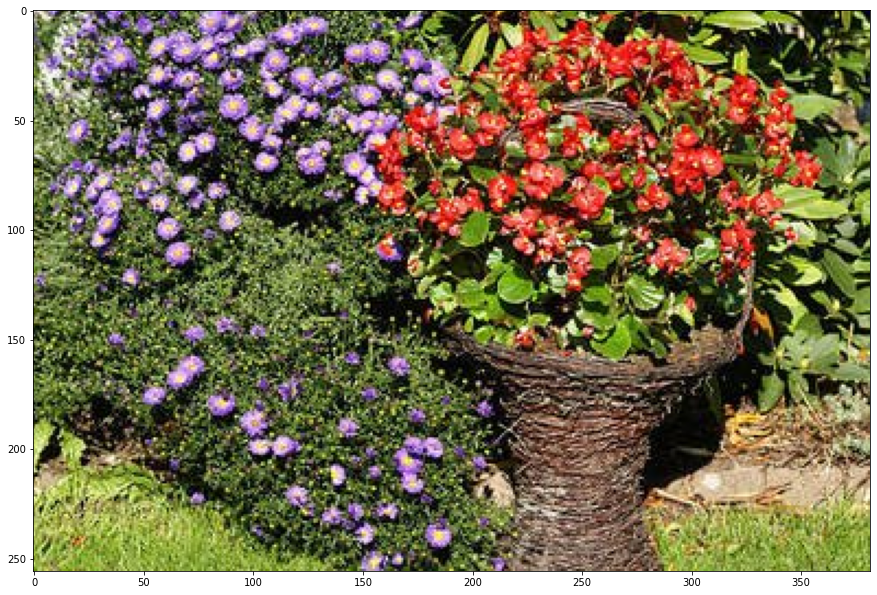

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

In [8]:
batch_size = 25
image_size = 512, 512
dir_name = "images"

In [9]:
dataset_sequence = HotWatermarkedImagesS3(bucket, batch_size, image_size, dir_name)

In [16]:
batch = dataset_sequence.__getitem__(150)

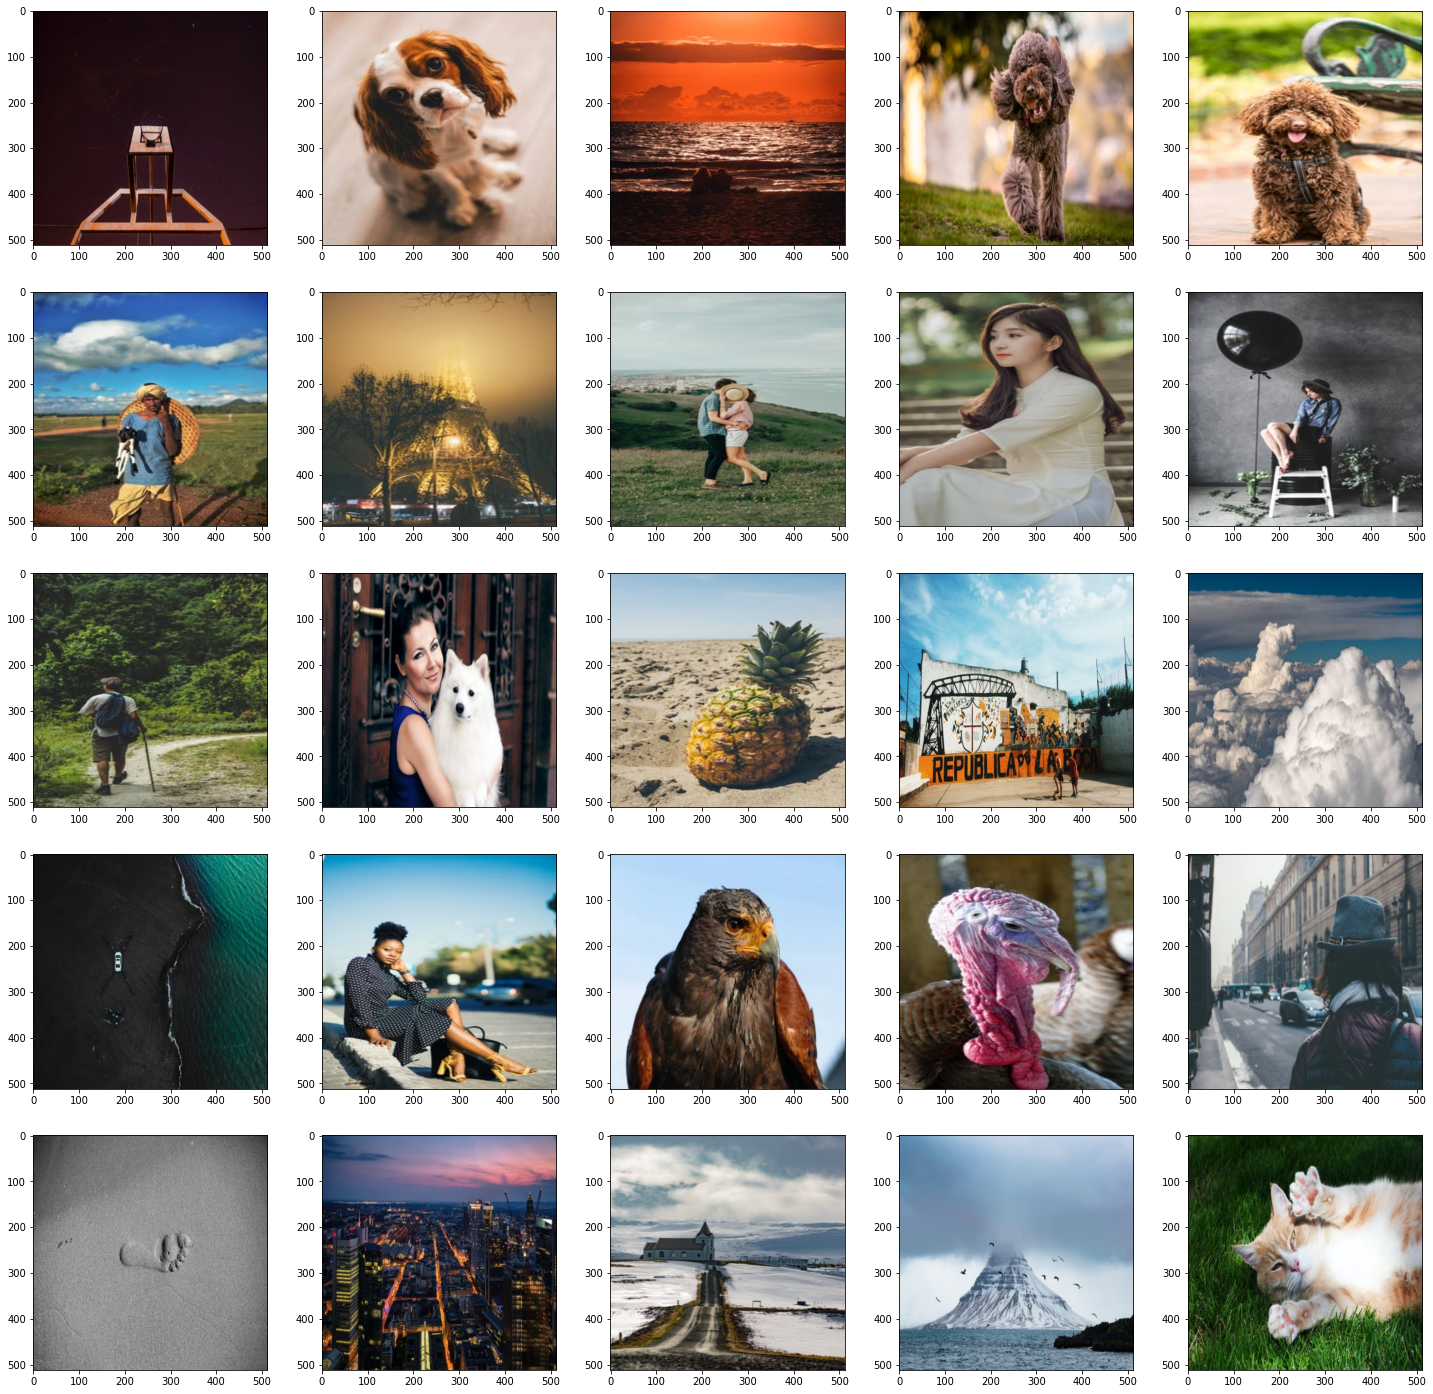

In [17]:
plt.figure(figsize=(25,25))
for i in range(batch_size):
    plt.subplot(5,5,i+1)
    plt.imshow(batch[0][i])
plt.show()

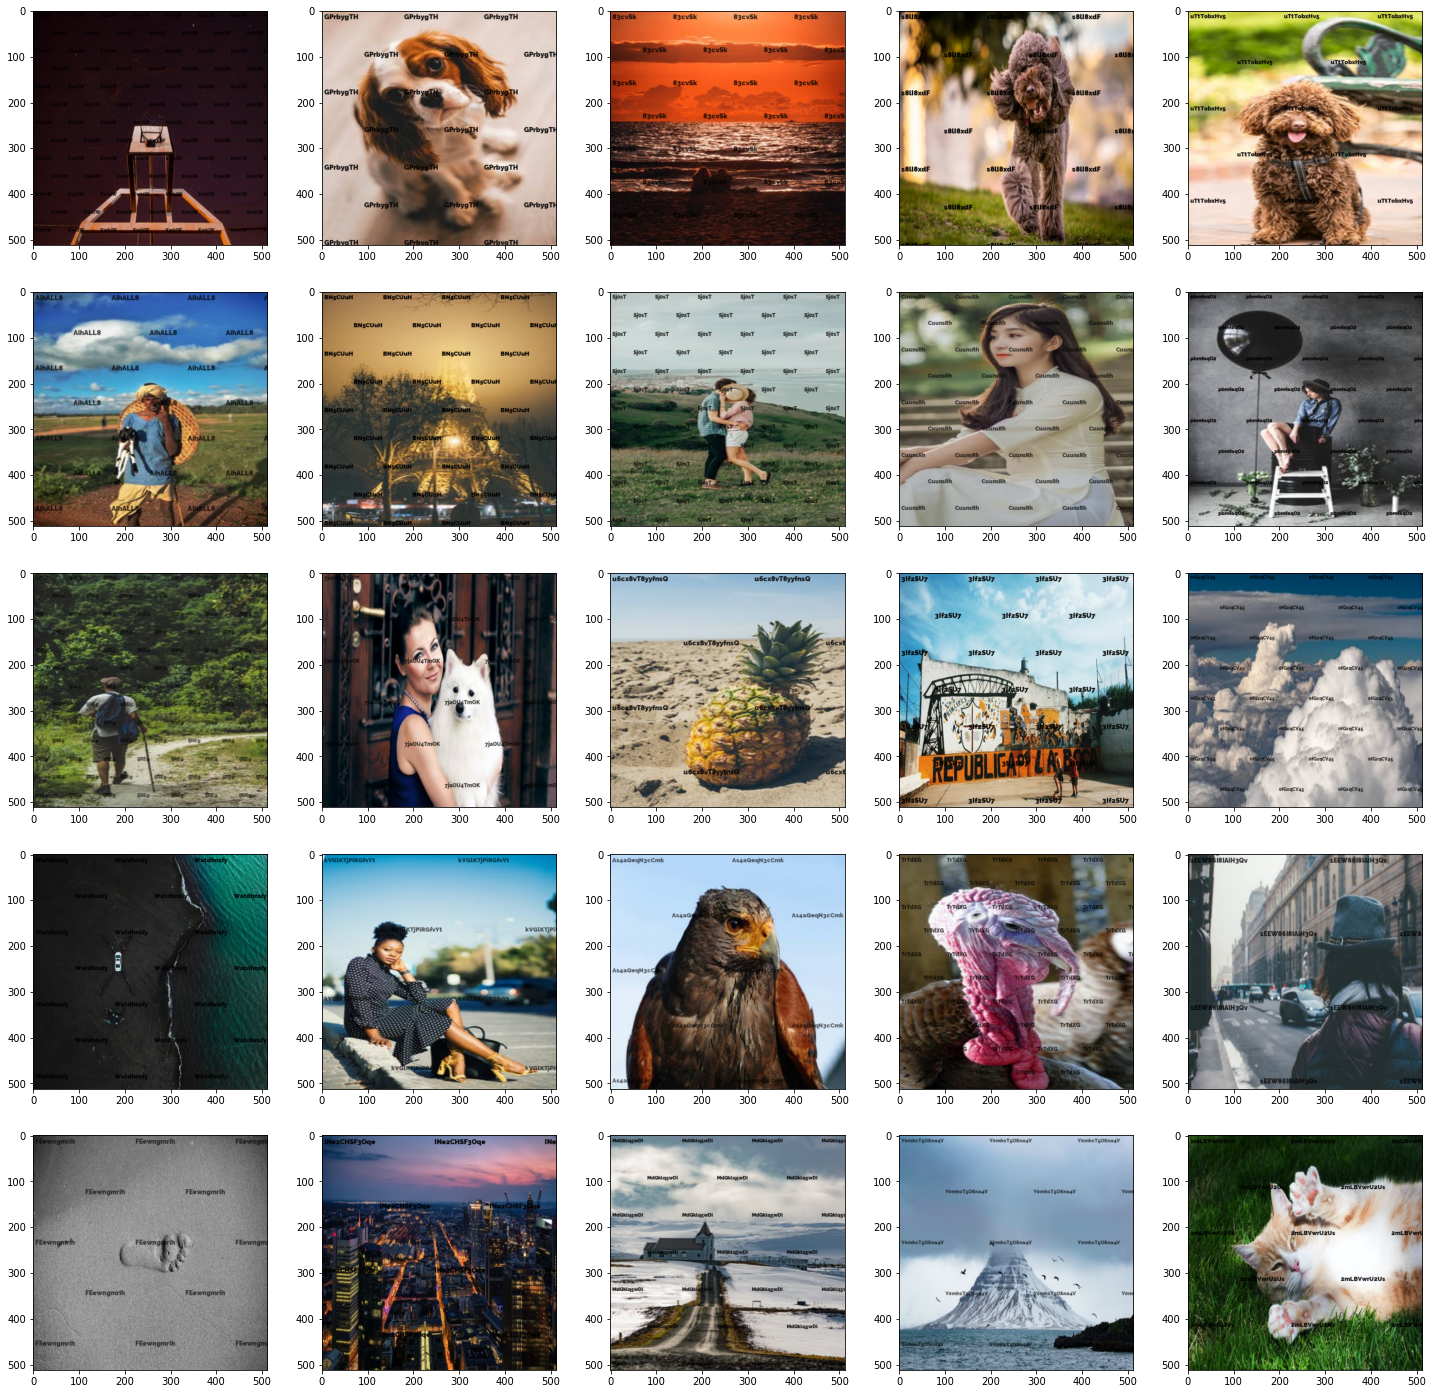

In [18]:
plt.figure(figsize=(25,25))
for i in range(batch_size):
    plt.subplot(5,5,i+1)
    plt.imshow(batch[1][i])
plt.show()

In [12]:
print(batch[1][1])

[[[0.25882354 0.2901961  0.19607843]
  [0.25882354 0.2901961  0.19607843]
  [0.25882354 0.2901961  0.19607843]
  ...
  [0.6        0.42745098 0.23529412]
  [0.5882353  0.41568628 0.22352941]
  [0.58431375 0.4117647  0.21960784]]

 [[0.25882354 0.2901961  0.19607843]
  [0.25882354 0.2901961  0.19607843]
  [0.25882354 0.2901961  0.19607843]
  ...
  [0.6        0.42745098 0.23529412]
  [0.5882353  0.41568628 0.22352941]
  [0.58431375 0.4117647  0.21960784]]

 [[0.25882354 0.2901961  0.19607843]
  [0.25882354 0.2901961  0.19607843]
  [0.25882354 0.2901961  0.19607843]
  ...
  [0.6        0.42745098 0.23529412]
  [0.5921569  0.41960785 0.22745098]
  [0.58431375 0.4117647  0.21960784]]

 ...

 [[0.14901961 0.20392157 0.08627451]
  [0.14509805 0.2        0.08235294]
  [0.15686275 0.20392157 0.08235294]
  ...
  [0.28627452 0.2509804  0.1764706 ]
  [0.23921569 0.21568628 0.15686275]
  [0.20784314 0.1882353  0.14117648]]

 [[0.15686275 0.21960784 0.10196079]
  [0.14901961 0.20784314 0.09019608]
